In [2]:
import librosa.core
import librosa.display
import librosa.feature
import librosa.util
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data_home = '/Volumes/MacPassport/IEMOCAP_full_release'

In [5]:
y, sr = librosa.load(audio_path)

In [8]:
D = np.abs(librosa.stft(y))

In [10]:
D.shape

(1025, 5755)

In [4]:
audio_df = pd.read_csv('/Volumes/MacPassport/IEMOCAP_full_release/preprocessing/df_iemocap.csv')
audio_df.head()
indexNames = audio_df[ audio_df['emotion'] == 'xxx' ].index

# Delete these row indexes from dataFrame
audio_df.drop(indexNames , inplace=True)
audio_df.reset_index(drop=True, inplace=True)
audio_df.head(), len(audio_df)

(   start_time  end_time             wav_file emotion  val  act  dom
 0      6.2901    8.2357  Ses01F_impro01_F000     neu  2.5  2.5  2.5
 1     10.0100   11.3925  Ses01F_impro01_F001     neu  2.5  2.5  2.5
 2     14.8872   18.0175  Ses01F_impro01_F002     neu  2.5  2.5  2.5
 3     27.4600   31.4900  Ses01F_impro01_F005     neu  2.5  3.5  2.0
 4     38.9650   43.5900  Ses01F_impro01_F006     fru  2.0  3.5  3.5, 7532)

In [5]:
start = np.array(audio_df['start_time'])
end = np.array(audio_df['end_time'])
durations = end - start
avg_duration = np.mean(durations)
avg_duration

4.558073114710569

In [7]:
AUDIO_NUM = 846
filename = audio_df['wav_file'][AUDIO_NUM]
offset = audio_df['start_time'][AUDIO_NUM]
duration = float(audio_df['end_time'][AUDIO_NUM]) - float(audio_df['start_time'][AUDIO_NUM])
a1, sr1 = librosa.load(f'{data_home}/Session{filename[4]}/dialog/wav/{filename[:-5]}.wav',offset=offset,duration=avg_duration)


AUDIO_NUM = 19
filename = audio_df['wav_file'][AUDIO_NUM]
offset = audio_df['start_time'][AUDIO_NUM]
duration = float(audio_df['end_time'][AUDIO_NUM]) - float(audio_df['start_time'][AUDIO_NUM])
a2, sr2 = librosa.load(f'{data_home}/Session{filename[4]}/dialog/wav/{filename[:-5]}.wav',offset=offset,duration=avg_duration)


size = len(a2)
    size

100506

In [6]:
mel1 = np.abs((librosa.feature.melspectrogram(a1)))# mel1 = librosa.util.normalize(mel1)
mel2 = np.abs((librosa.feature.melspectrogram(a2)))
librosa.power_to_db(mel1, ref=np.max)
mel1.shape, mel2.shape

((128, 170), (128, 197))

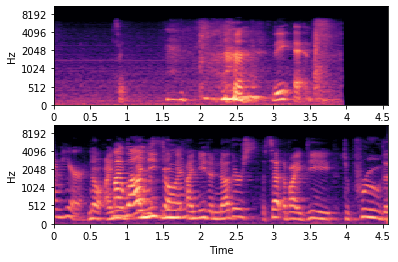

In [58]:
# plt.figure(figsize=(12, 4))
plt.subplot(2,1,1)

librosa.display.specshow(librosa.power_to_db(mel1, ref=np.max),
                         y_axis='mel', x_axis='time')
plt.subplot(2,1,2)
librosa.display.specshow(librosa.power_to_db(mel2, ref=np.max),
                         y_axis='mel', x_axis='time')
# librosa.display.specshow(mel1,x_axis='time',y_axis='linear',sr=sr)

# # librosa.display.specshow(mel2,x_axis='time',y_axis='mel',sr=sr)
# plt.show()

In [14]:
%%time
mel_spectrograms = np.zeros((7532,128,197))
mel_spectrograms_db = np.zeros((7532,128,197))
not_done = []
labels = [None]*7532
for i in range(50):
    filename = audio_df['wav_file'][i]
    offset = audio_df['start_time'][i]
    a, sr = librosa.load(f'{data_home}/Session{filename[4]}/dialog/wav/{filename[:-5]}.wav',offset=offset,duration=avg_duration)
    if len(a)!= size:
        a = np.pad(a, (0, size-len(a)), 'constant')
    mel = np.abs((librosa.feature.melspectrogram(a)))
    mel_db = librosa.power_to_db(mel, ref=np.max)
    mel_spectrograms[i] = mel
    mel_spectrograms_db[i] = mel_db
    labels[i] = audio_df['emotion'][i]
    if i%500 == 0:
        print(f'{i}th vector complete')
    
    

0th vector complete
CPU times: user 12.8 s, sys: 926 ms, total: 13.7 s
Wall time: 7.92 s


In [22]:
from joblib import Parallel, delayed

mel_spectrograms = np.zeros((7532,128,197))
mel_spectrograms_db = np.zeros((7532,128,197))

def foo(data,x):
    global audio_df, size, labels
    array1, array2, labels = data
    filename = audio_df['wav_file'][i]
    offset = audio_df['start_time'][i]
    a, sr = librosa.load(f'{data_home}/Session{filename[4]}/dialog/wav/{filename[:-5]}.wav',offset=offset,duration=avg_duration)
    if len(a)!= size:
        a = np.pad(a, (0, size-len(a)), 'constant')
    mel = np.abs((librosa.feature.melspectrogram(a)))
    mel_db = librosa.power_to_db(mel, ref=np.max)
    array1[x] = mel
    array2[x] = mel_db
    labels[x] = audio_df['emotion'][i]
    return 0

def main(mel_spectrograms,mel_spectrograms_db, labels):
    inputs = list(range(7532))
    if __name__ == '__main__':
        Parallel()(delayed(foo)((mel_spectrograms,mel_spectrograms_db, labels),i) for i in inputs)

main(mel_spectrograms,mel_spectrograms_db, labels)

IndentationError: expected an indented block (<ipython-input-22-d77376cd564e>, line 24)